In [2]:
import warnings
warnings.filterwarnings("ignore") # Suppress warnings, useful for cleaner output

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
import xgboost as xgb  
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [3]:
# Load and show the dataset from the specified path
df = pd.read_csv("D:/processed_anomaly_training_loan_data.csv", header=0)
df.head()

,id,member_id,loan_amnt,int_rate,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag,anomaly_score,anomaly
0,10000001,11983056.0,7550,16.24,28000.0,100.0,96.0,8.40,0.0,17.0,72.0,4000.0,3828.953801,5759.0,99,0.0,0.105777,1
1,10000002,12002921.0,27050,10.99,55000.0,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,34359.940730,114834.0,353,0.0,0.107448,1
2,10000003,11983096.0,12000,10.99,60000.0,0.0,15.9,4.62,1.0,3.0,24.0,18100.0,16416.617760,7137.0,157,0.0,0.117730,1
3,10000004,12003142.0,28000,7.62,325000.0,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,38014.149760,799592.0,365,0.0,-0.006403,-1
4,10000005,11993233.0,12000,13.53,40000.0,33.3,79.6,16.94,0.0,17.0,68.8,7000.0,6471.462236,13605.0,157,0.0,0.135942,1


Minority class ratio: 0.0698
Majority class ratio: 0.9302


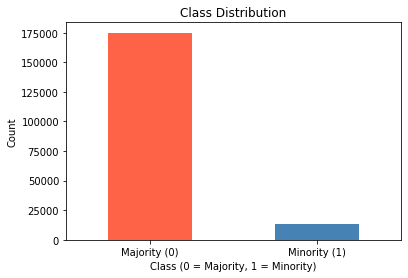

In [4]:
# Count the number of samples in each class
minority_count = df[df['bad_flag'] == 1].shape[0]
majority_count = df[df['bad_flag'] == 0].shape[0]
total_count = len(df)

# Calculate the proportions of each class
minority_ratio = minority_count / total_count  # Proportion of the minority class
majority_ratio = majority_count / total_count  # Proportion of the majority class

print(f"Minority class ratio: {minority_ratio:.4f}")
print(f"Majority class ratio: {majority_ratio:.4f}")

# Plot class distribution
plt.figure(figsize=(6, 4))
df['bad_flag'].value_counts().plot(kind='bar', color=['#FF6347', '#4682B4'])
plt.title("Class Distribution")
plt.xlabel("Class (0 = Majority, 1 = Minority)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Majority (0)', 'Minority (1)'], rotation=0)
plt.show()

shape of original training set: (150498,)
shape of SMOTE training set: (215027,)

y train: {0.0: 140056, 1.0: 10442}
y train resampled: {0.0: 89477, 1.0: 125550}


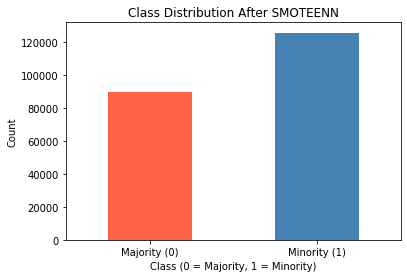

In [5]:
# Splitting data into training and testing sets
X = df.drop(columns=['bad_flag','anomaly_score','anomaly'], axis=1)
y = df['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Handling class imbalance using SMOTEENN (SMOTE + Edited Nearest Neighbors)
smote_enn = SMOTEENN(random_state=123)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

print(f'shape of original training set: {y_train.shape}')
print(f'shape of SMOTE training set: {y_train_resampled.shape}')
print()

print(f'y train: {dict(Counter(y_train))}')
print(f'y train resampled: {dict(Counter(y_train_resampled))}')

# Convert Counter to a pandas Series for easy plotting
resampled_counter = pd.Series(Counter(y_train_resampled))

# Visualize the class distribution after resampling
plt.figure(figsize=(6, 4))
resampled_counter.plot(kind='bar', color=['#FF6347', '#4682B4'])
plt.title("Class Distribution After SMOTEENN")
plt.xlabel("Class (0 = Majority, 1 = Minority)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Majority (0)', 'Minority (1)'], rotation=0)
plt.show()

Classification Report for Fold 1: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     17896
         1.0       0.98      0.89      0.93     25110

    accuracy                           0.93     43006
   macro avg       0.92      0.93      0.92     43006
weighted avg       0.93      0.93      0.93     43006

Fold 1 AUC: 0.9749


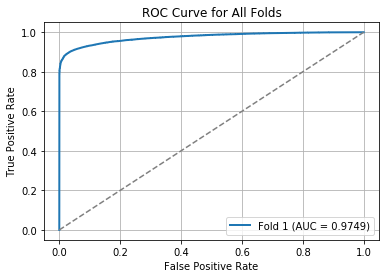

Classification Report for Fold 2: 
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     17896
         1.0       0.98      0.89      0.93     25110

    accuracy                           0.93     43006
   macro avg       0.92      0.93      0.93     43006
weighted avg       0.93      0.93      0.93     43006

Fold 2 AUC: 0.9761


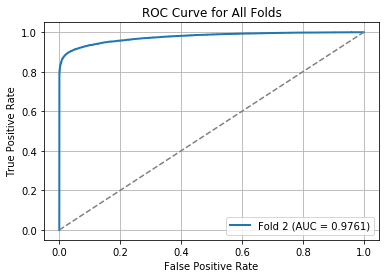

Classification Report for Fold 3: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     17895
         1.0       0.98      0.89      0.93     25110

    accuracy                           0.93     43005
   macro avg       0.92      0.93      0.93     43005
weighted avg       0.93      0.93      0.93     43005

Fold 3 AUC: 0.9759


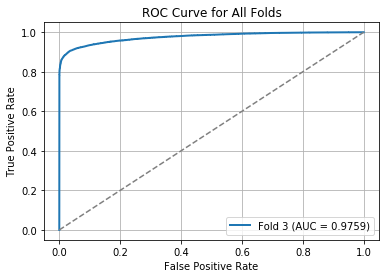

Classification Report for Fold 4: 
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     17895
         1.0       0.98      0.89      0.93     25110

    accuracy                           0.92     43005
   macro avg       0.92      0.93      0.92     43005
weighted avg       0.93      0.92      0.93     43005

Fold 4 AUC: 0.9744


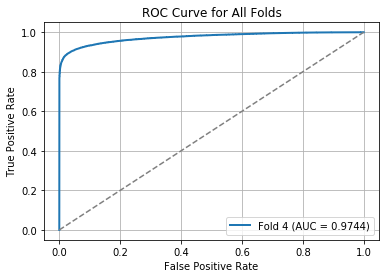

Classification Report for Fold 5: 
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     17895
         1.0       0.98      0.89      0.93     25110

    accuracy                           0.92     43005
   macro avg       0.92      0.93      0.92     43005
weighted avg       0.93      0.92      0.93     43005

Fold 5 AUC: 0.9744


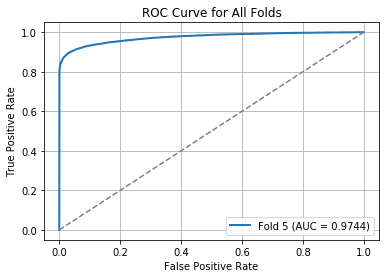

In [6]:
# StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

f1scores = []
aucs = []

# Calculate the scale_pos_weight: ratio of majority class to minority class in the resampled data
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])
scale_pos_weight

# Set up the XGBoost model with specified hyperparameters
model = xgb.XGBClassifier(
    n_estimators=100,  # number of boosting rounds (trees)
    learning_rate=0.1,  # learning rate for more stable model
    max_depth=5,  # Max depth of trees
    scale_pos_weight=scale_pos_weight,  # Set the scale_pos_weight to handle imbalance
    random_state=123,
    eval_metric='logloss'  # Evaluation metric for binary classification
)


for fold, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
    # Split the data into training and validation sets for each fold
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]
    
    # Fit the model
    model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_pred_fold = model.predict(X_val_fold)
    y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1]  # Get probability of the positive class
    
       
    # Calculate F1 score and append to the list
    f1 = f1_score(y_val_fold, y_pred_fold)
    f1scores.append(f1)
    
    # Print classification report for analysis
    print(f"Classification Report for Fold {fold+1}: \n{classification_report(y_val_fold, y_pred_fold)}")
    
    
    # Calculate AUC score and append to the list
    auc_score = roc_auc_score(y_val_fold, y_pred_proba_fold)
    aucs.append(auc_score)
    
    # Print AUC for this fold
    print(f"Fold {fold+1} AUC: {auc_score:.4f}")
    
    # Plot ROC curve for this fold
    fpr, tpr, thresholds = roc_curve(y_val_fold, y_pred_proba_fold)
    roc_auc_score_fold = auc(fpr, tpr)  # Renamed to avoid conflict
    
    
    plt.plot(fpr, tpr, lw=2, label=f"Fold {fold+1} (AUC = {roc_auc_score_fold:.4f})")

    # Plot settings for ROC curve
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for All Folds')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [7]:
# Print the F1 score across all folds
print(f'Mean F1 score: {np.mean(f1scores):.4f}')
print(f'Standard Deviation of F1 score: {np.std(f1scores):.4f}')
print(f'\nList of F1 Score from StratifiedKFold cross-validation: \n{f1scores}')
print()
# Print the AUC score across all folds
print(f"Average AUC Score: {np.mean(aucs):.4f}")
print(f'Standard Deviation of AUC score: {np.std(aucs):.4f}')
print(f'\nList of AUC Score from StratifiedKFold cross-validation: \n{aucs}')

Mean F1 score: 0.9332
Standard Deviation of F1 score: 0.0006

List of F1 Score from StratifiedKFold cross-validation: 
[0.9332637075718015, 0.934239606355031, 0.9335339225641991, 0.9326042036275595, 0.9324846081602838]

Average AUC Score: 0.9751
Standard Deviation of AUC score: 0.0007

List of AUC Score from StratifiedKFold cross-validation: 
[0.9748992998086025, 0.9760583395064398, 0.9759416099199844, 0.9743527718051747, 0.9743769248222045]


In [8]:
# Inference (on the testing dataset)
dftest = pd.read_csv("D:/processed_anomaly_testing_loan_data.csv", header=0)

dftest_cleaned = dftest.drop(columns=['anomaly_score', 'anomaly', 'bad_flag'], errors='ignore')

# Predict probabilities for the positive class (bad_flag) on the testing set
y_pred_proba_dftest = model.predict_proba(dftest_cleaned)[:, 1]
dftest['bad_flag_prob'] = y_pred_proba_dftest

# Set threshold for classification (probability > 0.6 is classified as 1)
threshold = 0.6

# Classify the instances based on the threshold
dftest['bad_flag'] = (dftest['bad_flag_prob'] >= threshold).astype(int)
list(dftest['bad_flag'])[:20]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [9]:
# check the ration of bad_flag 1:0 in the train and test df

predtest = sum(1 for i in list(dftest['bad_flag']) if i == 1)
lentest = len(list(dftest['bad_flag']))
print(f'the ratio of 1:0 in the predecited test df: {predtest / lentest}')

predtrain = sum(1 for i in list(y_train) if i == 1)
lentrain = len(list(y_train))
print(f'\nthe ratio of 1:0 in the original train df: {predtrain / lentrain}')

the ratio of 1:0 in the predecited test df: 0.1103946148968343

the ratio of 1:0 in the original train df: 0.06938298183364563


In [10]:
dftest.head()

,id,member_id,loan_amnt,int_rate,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score,anomaly_score,anomaly,bad_flag,bad_flag_prob
0,20000001,22419852,10000,22.15,37000.0,80.0,83.0,28.51,1,3.0,73.1,16200,14877.170280,36809,131,0.115904,1,0,0.533596
1,20000002,22349118,1400,18.24,41000.0,0.0,0.0,26.58,0,9.0,11.5,4000,4097.304770,19536,19,0.032762,1,0,0.403181
2,20000003,22398818,7000,12.49,68900.0,60.0,75.9,6.60,0,11.0,48.1,11900,12688.495160,241465,92,0.124508,1,0,0.458806
3,20000004,22419015,18000,16.29,41000.0,33.3,61.1,20.61,1,0.0,38.1,7600,7908.799817,179757,235,0.144529,1,1,0.660521
4,20000005,22388614,12000,12.99,64000.0,75.0,67.0,24.61,0,6.0,57.9,21000,19378.561060,31953,157,0.161886,1,0,0.317421
